In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [14]:
df = pd.read_csv("measurements.csv")

In [32]:
lambda_lin = np.linspace(min(df["lambda"]), max(df["lambda"]), 1000)
alpha_func = lambda x, a, b, c: a * x ** 2 + b * x + c
coefs = curve_fit(alpha_func, df["lambda"], df["alpha"])[0]
a, b, c = coefs
a, b, c

(-0.008126215533200733, 15.022199772791309, -3503.9968812222955)

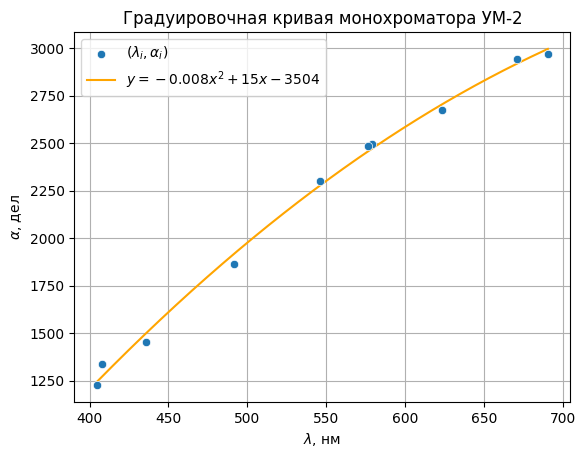

In [33]:
sns.scatterplot(df, x="lambda", y="alpha", zorder=3.0, label=rf"$(\lambda_i, \alpha_i)$")
plt.plot(lambda_lin, alpha_func(lambda_lin, *coefs), c="orange", label=rf"$y={round(a, 3)}x^2+{round(b)}x{round(c)}$")
plt.grid(zorder=2.0)
plt.title("Градуировочная кривая монохроматора УМ-2")
plt.xlabel(r"$\lambda$" + ", нм")
plt.ylabel(r"$\alpha$" + ", дел")
plt.legend()

In [30]:
def find_nearest(i):
    return min(lambda_lin, key=lambda x: abs(i - alpha_func(x, *coefs)))

In [ ]:
hg_alphas = [2822, 1830, 1200]
hg_lambd = np.array([find_nearest(i) for i in hg_alphas])
hg_nu = 1 / hg_lambd
hg_lambd, hg_nu

(array([648.9022022 , 479.42072072, 404.7       ]),
 array([0.00154106, 0.00208585, 0.00247097]))

In [109]:
X = 1 / (np.arange(3, 6) ** 2)
X2 = 1 / (np.arange(3, 200) ** 2)
nu_func = lambda x, a, b: a * x + b
coefs2 = curve_fit(nu_func, X, hg_nu)[0]

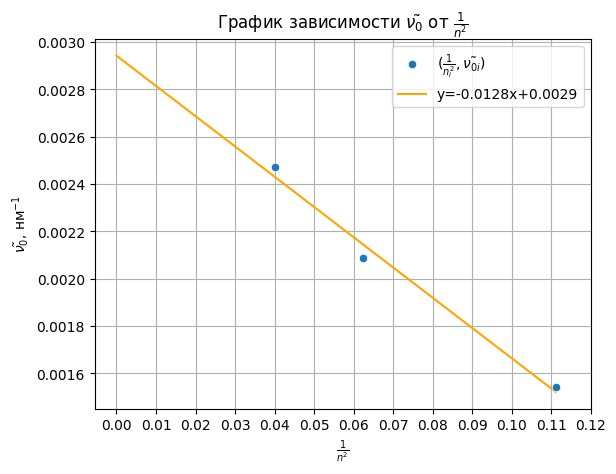

In [115]:
sns.scatterplot(x=X, y=hg_nu, zorder=3.0, label=r"$(\frac{1}{n^2_i},\tilde{\nu_{0i}})$")
plt.plot(X2, nu_func(X2, *coefs2), c="orange", label=rf"y={round(coefs2[0], 4)}x+{round(coefs2[1], 4)}")
plt.grid(zorder=2.0)
plt.xlabel(r"$\frac{1}{n^2}$")
# print(plt.xticks()[0].tolist())
plt.ylabel(r"$\tilde{\nu_0}$" + ", нм" + r"$^{-1}$")
plt.title("График зависимости " + r"$\tilde{\nu_0}$" + " от " + r"$\frac{1}{n^2}$")
plt.legend()
plt.xticks(np.arange(0, 0.13, 0.01))
plt.show()

In [111]:
R_4 = 4 * nu_func(X2[-1], *coefs2) * 10 ** 9
R_4

11768389.632355925

In [136]:
m_e = 9.109e-31       # масса электрона, кг
e = 1.602e-19         # заряд электрона, Кл
eps_0 = 8.85e-12     # электрическая постоянная, Ф/м
h = 6.626e-34         # постоянная Планка, Дж*с
c = 2.998e8            # скорость света, м/с


R_theor = (m_e * e**4) / (8 * eps_0**2 * h**3 * c)
R_theor

10978886.55492984

In [113]:
R_coef = abs(coefs2[0])
R_coef * 10 ** 9

12777327.643388834

In [126]:
hg_lambd_balmer = (1 / (R_theor * (1/4 - X))) * 10 ** 9
hg_lambd_balmer

array([656.39715916, 486.2201179 , 434.12510527])

In [127]:
abs(hg_lambd - hg_lambd_balmer)

array([ 7.49495696,  6.79939718, 29.42510527])

In [133]:
N = len(X)
D = np.sum((X - X.mean()) ** 2)
d_sum = np.sum((hg_nu - nu_func(X, *coefs2)) ** 2)
delta_R1 = 2 * np.sqrt(d_sum / ((N - 2) * D))
delta_R1 * 10 ** 9

2824749.159064203

In [134]:
delta_R2 = 8 * np.sqrt((1 / N + X.mean() ** 2 / D) * ((d_sum) / (N - 2)))
delta_R2 * 10 ** 9

871609.2440324936